# TESTING SHIT

## IMPORT STANDARD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import config

np.random.seed(0)

## IMPORT FROM SCRIPTS

In [2]:
from implementations import *

from proj1_helpers import load_csv_data, predict_labels, create_csv_submission

## CHECK GLOBAL

In [3]:
DATA_PATH = "../data"
PREPROCESSED_PATH = DATA_PATH + "/" + "preprocessed"
SUBMISSION_PATH = "../submissions"

TRAIN_DATA_CSV_PATH = DATA_PATH + "/" + "train.csv"
TEST_DATA_CSV_PATH = DATA_PATH + "/" + "test.csv"

TRAIN_URL = "https://github.com/epfml/ML_course/blob/master/projects/project1/data/train.csv.zip?raw=true"
TEST_URL = "https://github.com/epfml/ML_course/blob/master/projects/project1/data/test.csv.zip?raw=true"

PREPROCESSED_X_NPY = "../data/preprocessed/X.npy"
PREPROCESSED_Y_NPY = "../data/preprocessed/Y.npy"
PREPROCESSED_X_te_NPY = "../data/preprocessed/X_te.npy"
PREPROCESSED_Y_te_NPY = "../data/preprocessed/Y_te.npy"
PREPROCESSED_IDS_TE_NPY = "../data/preprocessed/IDS_TE.npy"

IMPLEMENTATIONS = {
    "Least Squares Gradient Descent": least_squares_GD,
    "Least Squares Stochastic GD": least_squares_SGD,
    "Least Squares using Pseudo-Inverse": least_squares,
    "Ridge Regression": ridge_regression,
    "Logistic Regression": logistic_regression,
    "Regularized Logistic Regression": reg_logistic_regression
}

Z_VALUE = 3.0
DO_Z_OUTLIER_DETECTION = True

MAX_ITERS = 100
GAMMA = .01
LAMBDA_ = .1
K = 5
USE_OLD_DATA = False

## DOWNLOAD FILES

In [4]:
import requests 
import zipfile
    
def download_url(url, save_path, chunk_size=128):
    print("[*] Downloading from [{}]".format(url))
    r = requests.get(url, stream=True)
    with open(save_path+".zip", 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)
    print("[*] Uncompressing to [{}]".format(save_path))
    with zipfile.ZipFile(save_path+".zip", 'r') as zip_ref:
        zip_ref.extractall(DATA_PATH)

if not (os.path.isdir(DATA_PATH)):
    os.mkdir(DATA_PATH)
if not (os.path.isfile(TRAIN_DATA_CSV_PATH) and os.path.isfile(TEST_DATA_CSV_PATH)):
    download_url(TRAIN_URL, TRAIN_DATA_CSV_PATH)
    download_url(TEST_URL, TEST_DATA_CSV_PATH)

## DATA EXPLORATION

In [5]:
import pandas as pd

Y, X, ids = load_csv_data(TRAIN_DATA_CSV_PATH)
Y_te, X_te, ids_te = load_csv_data(TEST_DATA_CSV_PATH)

col = ["feat{}".format(indx+1) for indx in range(30)]



X_df = pd.DataFrame(X, columns=col)
X_te_df = pd.DataFrame(X_te, columns=col)
X_df

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,feat29,feat30
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2.0,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1.0,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1.0,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,55.892,...,2.859,144.665,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
249996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,50.618,...,-0.867,80.408,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
249997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,120.462,...,-2.890,198.907,1.0,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992
249998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,55.859,...,0.811,112.718,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [6]:
Y_df = pd.DataFrame(Y)
sum(Y==1.0)/Y.shape[0]

0.342668

In [7]:
# check for each feature, how many -999 it has
for indx, col in enumerate(X_df.columns):
    print("========================================================")
    print("Feature {}: Has {} missing values ==> {}%!".format(indx+1, sum(X_df[col]==-999.), 100*sum(X_df[col]==-999.)/len(X_df)))
    print("Mean {} and Variance {}".format(np.mean(X_df[col]), np.var(X_df[col])))
    print("Number of unique Elements: {}".format(len(np.unique(X_df[col]))))
    print(np.unique(X_df[col]))

Feature 1: Has 38114 missing values ==> 15.2456%!
Mean -49.023079440000004 and Variance 165116.12412717938
Number of unique Elements: 108338
[-999.       9.044    9.222 ...  987.561  988.199 1192.026]
Feature 2: Has 0 missing values ==> 0.0%!
Mean 49.239819276 and Variance 1249.2559418725507
Number of unique Elements: 101637
[0.00000e+00 1.00000e-03 2.00000e-03 ... 5.94287e+02 5.95819e+02
 6.90075e+02]
Feature 3: Has 0 missing values ==> 0.0%!
Mean 81.181981612 and Variance 1666.975302663858
Number of unique Elements: 100558
[   6.329    6.462    7.12  ... 1153.166 1329.913 1349.351]
Feature 4: Has 0 missing values ==> 0.0%!
Mean 57.895961656 and Variance 4052.0295941117856
Number of unique Elements: 115563
[0.000000e+00 5.000000e-03 1.100000e-02 ... 7.628060e+02 1.053807e+03
 2.834999e+03]
Feature 5: Has 177457 missing values ==> 70.9828%!
Mean -708.4206753999999 and Variance 206551.75785299003
Number of unique Elements: 7087
[-9.990e+02  0.000e+00  1.000e-03 ...  8.326e+00  8.459e+00

### Insights
The following features containg missing values:
* feat1:  15%
* feat5:  70%
* feat6:  70%
* feat7:  70%
* feat13: 70%
* feat24: 40%
* feat25: 40%
* feat26: 40%
* feat27: 70%
* feat28: 70%
* feat29: 70%
    
Also:
* feat23 has takes only 4 values

In [8]:
missing_values = []
missing_values_unique = []
for indc in range(len(X_df)):
    missing_values.append([x == -999. for x in list(X_df.iloc[indc])])
    
for m in missing_values:
    if not (m in missing_values_unique):
        missing_values_unique.append([i for i, x in enumerate(m) if x])
        
np.unique(missing_values_unique)

### Insights

We basically have 6 groups of data in respect to missing values
* Group 1: Have no missing values
* Group 2: Missing features: [1]
* Group 4: Missing features: [5,6,7,13,27,28,29]
* Group 5: Missing features: [1,5,6,7,13,27,28,29]
* Group 6: Missing features: [5,6,7,13,24,25,26,27,28,29] 
* Group 7: Missing features: [1,5,6,7,13,24,25,26,27,28,29] 

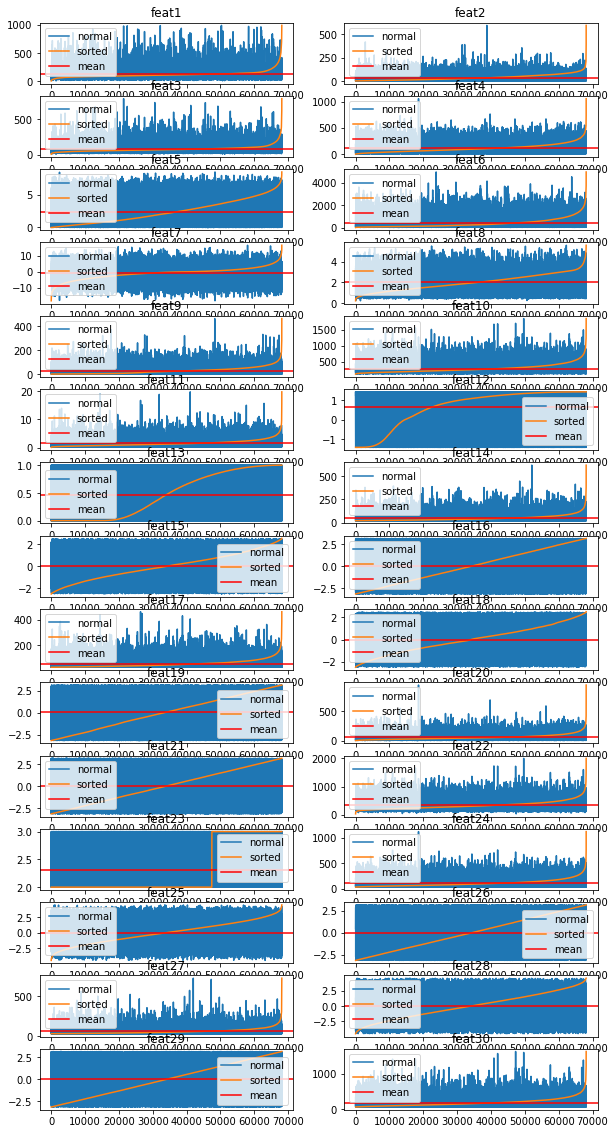

In [12]:
# NOT CORRECT I THINK
# For now, let us take a close clook at the features, while leaving out the 
# rows containing missing data
X_g = X_df[X_df != -999.].dropna(axis=0).reset_index(drop=True)

means = []
variances = []
fig, ax = plt.subplots(15, 2, figsize=(10,20))
for indx, col in enumerate(X_g.columns):
    #print("Feature {}: Has {} missing values ==> {}%!".format(indx+1, sum(X_g[col]==-999.), 100*sum(X_g[col]==-999.)/len(X_g)))
    #print("Mean {} and Variance {}".format(np.mean(X_g[col]), np.var(X_g[col])))
    ax[int(indx/2), indx%2].plot(X_g[col], label="normal")
    ax[int(indx/2), indx%2].plot(sorted(X_g[col]), label="sorted")
    ax[int(indx/2), indx%2].set_title(col)
    ax[int(indx/2), indx%2].axhline(np.mean(X_g[col]), color="red", label="mean")
    ax[int(indx/2), indx%2].legend()

## PREPROCESSING

In [ ]:
if (os.path.isdir(PREPROCESSED_PATH) and USE_OLD_DATA):
    print("[*] Using previously preprocessed Data")
    X = np.load(PREPROCESSED_X_NPY)
    X_te = np.load(config.PREPROCESSED_X_TE_NPY)
    Y = np.load(PREPROCESSED_Y_NPY)
    Y_te = np.load(config.PREPROCESSED_Y_TE_NPY)
    ids_te = np.load(PREPROCESSED_IDS_TE_NPY)

else:
    print("[*] Creating preprocessed Data")
    
    if not (os.path.isdir(PREPROCESSED_PATH)):
        os.mkdir(PREPROCESSED_PATH)
    
    # load data from csv files
    Y, X, ids = load_csv_data(TRAIN_DATA_CSV_PATH)
    Y_te, X_te, ids_te = load_csv_data(TEST_DATA_CSV_PATH)
    
    # split data into 3 groups, in respect to missing values
    X1 = X[X[:,5] != -999.]
    X2 = X[np.logical_and((X[:,5] == -999.), (X[:,24] != -999.))]
    X3 = X[np.logical_and((X[:,5] == -999.), (X[:,24] == -999.))]
    
    groups = [X1, X2, X3]
    
    print(X1.shape)
    print(X2.shape)
    print(X3.shape)
    
    """
    # perform preprocessing TODO seems to make it worse
    if DO_Z_OUTLIER_DETECTION:
        X = z_score_outlier_detection(X, thresh=Z_VALUE)
        X_te = z_score_outlier_detection(X_te, thresh=Z_VALUE)

    # Augment feature vector
    X = augment_features_polynomial(X, M=4)
    X_te = augment_features_polynomial(X_te, M=4)

    # standardize features
    X = standardize(X)
    X_te = standardize(X_te)

    # add ones
    X = add_ones_column(X)
    X_te = add_ones_column(X_te)

    np.save(PREPROCESSED_X_NPY, X, allow_pickle=True)
    np.save(PREPROCESSED_X_TE_NPY, X_te, allow_pickle=True)
    np.save(PREPROCESSED_Y_NPY, Y, allow_pickle=True)
    np.save(PREPROCESSED_Y_NPY, Y_te, allow_pickle=True)
    np.save(PREPROCESSED_IDS_TE_NPY, ids_te, allow_pickle=True)
    print("[*] Saved Preprocessed Data")
    """


In [ ]:
import numpy as np
import os
from proj1_helpers import load_csv_data
from preprocessing import standardize, add_bias

DATA_PATH = "../data"
PREPROCESSED_PATH = DATA_PATH + "/" + "preprocessed"
SUBMISSION_PATH = "../submissions"

TRAIN_DATA_CSV_PATH = DATA_PATH + "/" + "train.csv"
TEST_DATA_CSV_PATH = DATA_PATH + "/" + "test.csv"

TRAIN_URL = "https://github.com/epfml/ML_course/blob/master/projects/project1/data/train.csv.zip?raw=true"
TEST_URL = "https://github.com/epfml/ML_course/blob/master/projects/project1/data/test.csv.zip?raw=true"

PREPROCESSED_X_TR_GROUPS_NPY = "../data/preprocessed/X_tr.npy"
PREPROCESSED_Y_TR_GROUPS_NPY = "../data/preprocessed/Y_tr.npy"
PREPROCESSED_GROUP_INDX_TR_NPY = "../data/preprocessed/group_indx_tr.npy"
PREPROCESSED_X_TE_GROUPS_NPY = "../data/preprocessed/X_te.npy"
PREPROCESSED_Y_TE_GROUPS_NPY = "../data/preprocessed/Y_te.npy"
PREPROCESSED_IDS_TE_GROUPS_NPY = "../data/preprocessed/ids_te.npy"
PREPROCESSED_GROUP_INDX_TE_NPY = "../data/preprocessed/group_indx_te.npy"

def remove_redundant(X):
    print("EXECUTE")
    non_redundant_indc = []
    for col in range(X.shape[1]):
        if np.var(X[:,col]) != 0:
            non_redundant_indc.append(col)
        else:
            print("FOUND REDUNDANT", col)
    return X[non_redundant_indc]



def split_groups(Y, X, group_col_list = [list(range(30)),
                    [k for k in range(30) if k not in [0]],
                    [k for k in range(30) if k not in [4, 5, 6, 12, 26, 27, 28]],
                    [k for k in range(30) if k not in [0, 4, 5, 6, 12, 26, 27, 28]],
                    [k for k in range(30) if k not in [4, 5, 6, 12, 23, 24, 25, 26, 27, 28]],
                    [k for k in range(30) if k not in [0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28]]]):

    G1 = np.logical_and((X[:,0] != -999.), (X[:,4] != -999.))
    G2 = np.logical_and((X[:,0] == -999.), (X[:,4] != -999.))
    G3 = np.logical_and(np.logical_and((X[:,4] == -999.), (X[:,23] != -999.)), (X[:,0] != -999.))
    G4 = np.logical_and(np.logical_and((X[:,4] == -999.), (X[:,23] != -999.)), (X[:,0] == -999.))
    G5 = np.logical_and(np.logical_and((X[:,4] == -999.), (X[:,23] == -999.)), (X[:,0] != -999.))
    G6 = np.logical_and(np.logical_and((X[:,4] == -999.), (X[:,23] == -999.)), (X[:,0] == -999.))

    group_row_list = [G1, G2, G3, G4, G5, G6]

    groups_Y = [Y[indc] for indc in group_row_list]
    groups_X = [remove_redundant(X[indc][:,group_col_list[group]]) for group, indc in enumerate(group_row_list)]

    return groups_Y, groups_X, group_row_list
    return groups_Y, groups_X, group_row_list
save_preprocessed=True 
z_outlier=False

In [ ]:
print("[*] Creating preprocessed Data")

if not (os.path.isdir(PREPROCESSED_PATH)):
    os.mkdir(PREPROCESSED_PATH)

# load data from csv files
Y_tr, X_tr, ids_tr = load_csv_data(TRAIN_DATA_CSV_PATH)
Y_te, X_te, ids_te = load_csv_data(TEST_DATA_CSV_PATH)

groups_tr_Y, groups_tr_X, indc_list_tr = split_groups(Y_tr, X_tr)
groups_te_Y, groups_te_X, indc_list_te = split_groups(Y_te, X_te)

In [ ]:
list([])X1, X2, X3, X4, X5, X6 = groups_tr_X
X11 = pd.DataFrame(X1)
X22 = pd.DataFrame(X2)
X33 = pd.DataFrame(X3)
X44 = pd.DataFrame(X4)
X55 = pd.DataFrame(X5)
X66 = pd.DataFrame(X6)

In [ ]:


# load data from csv files
Y_tr, X_tr, ids_tr = load_csv_data(config.TRAIN_DATA_CSV_PN, D = X.shape)

    # find all classes and their absolute frequency
    abs_freq = {class:sum(Y==class) for class in np.unique(Y)}
    # identify values
    over_represented = max(abs_freq, key=abs_freq.get)
    under_represented = min(abs_freq, key=abs_freq.get)
    under_represented_matrix = X[Y==under_represented]
    # calculate their ratio
    ratio = over_represented/under_represented
    # calculate the amount of added samples
    added_samples = int(under_represented*ratio)
    X_new = np.zeros((N+added_samples, D))
    Y_new = np.zeros(N)

    # copy the existing data points
    X_new[:N] = X
    Y_new[:N] = Y

    # create distance matrix
    dist = np.zeros((under_represented_matrix.shape[0], under_represented_matrix.shape[0]))

    print("Calculating Distance Matrix")
    for indx1, row1 in enumerate(under_represented_matrix):
        for indx2, row2 in enumerate(under_represented_matrix):
            dist[indx1, indx2] = = numpy.linalg.norm(row1 - row2)
    # set diagonal too inf since it is out of the question
    np.fill_diagonal(dist, math.inf)
    # get K closest neighbours for each sample
    closest_neighbors = np.zeros((under_represented_matrix.shape[0], k))
    for indx in range(under_represented_matrix.shape[0]):
        closest_neighbors[indx] = np.argpartition(dist, k)
ATH)
Y_te, X_te, ids_te = load_csv_data(TEST_DATA_CSV_PATH)

groups_tr_Y, groups_tr_X, indc_list_tr = split_groups(Y_tr, X_tr)
groups_te_Y, groups_te_X, indc_list_te = split_groups(Y_te, X_te)

In [ ]:
XX = groups_tr_X[2]
XXX = pd.DataFrame(XX)

In [ ]:
print("EXECUTE")
non_redundant_indc = []
for col in range(XX.shape[1]):
    if not np.var(XX[:,col]) == 0:
        non_redundant_indc.append(col)
    else:
        print("FOUND REDUNDANT", col)
X[non_redundant_indc]

In [ ]:
import datetime

In [ ]:
datetime.datetime.now().strftime("%m_%d_%Y-%H_%M")

In [ ]:
import numpy as np
X = np.random.rand(1000, 1000)
x1, x2 = np.triu_indices(X.shape[1], 1)

In [ ]:
d = np.abs(X[:, x1] - X[:, x2])

In [ ]:
tpos = np.argpartition(d, 5)[:, :5]

In [ ]:
tpos.shape

In [ ]:
import pandas as pd

Y, X, ids = load_csv_data(TRAIN_DATA_CSV_PATH)
Y_te, X_te, ids_te = load_csv_data(TEST_DATA_CSV_PATH)

In [ ]:
X = X[:100]
Y = Y[:100]

In [ ]:
N, D = X.shape

# find all classes and their abosulte frequency
abs_freq = {c:sum(Y==c) for c in np.unique(Y)}
# identify values
over_represented = max(abs_freq, key=abs_freq.get)
under_represented = min(abs_freq, key=abs_freq.get)
under_represented_matrix = X[Y==under_represented]

# calculate their ratio
ratio = abs_freq[over_represented]/abs_freq[under_represented]

# calculate the amount of added samples
added_samples = int(abs_freq[under_represented]*(ratio-1))
X_new = np.zeros((N+added_samples, D))
Y_new = np.zeros(N+added_samples)

# copy the existing data points
X_new[:N] = X
Y_new[:N] = Y


In [ ]:

# create distance matrix
dist = np.zeros((under_represented_matrix.shape[0], under_represented_matrix.shape[0]))


In [ ]:
import math
k = 5
print("Calculating Distance Matrix")
for indx1, row1 in enumerate(under_represented_matrix):
    for indx2, row2 in enumerate(under_represented_matrix):
        dist[indx1, indx2] = np.linalg.norm(row1 - row2)
print("Finished")
# get K closest neighbours for each sample
closest_neighbors = np.zeros((under_represented_matrix.shape[0], k))
for indx in range(under_represented_matrix.shape[0]):
    closest_neighbors[indx] = np.argsort(dist[indx], 0)[:k]

# now generate new samples
for indx in range(added_samples):
    random_indx = np.random.randint(under_represented_matrix.shape[0])
    linear_combination_weights = np.random.dirichlet(np.ones(k),size=1)[0]
    X_new[N+indx] = np.sum([v*w for v,w in zip(under_represented_matrix[closest_neighbors[random_indx].astype(int)], linear_combination_weights)], axis=0)
# set labels in Y
Y_new[N:] = under_represented